# Lecture 3 : Time Series Analysis using Machine Learning

## Linear Regression using scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [4]:
revenue = np.array([2.6, 19. , 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [5]:
df = pd.DataFrame(data = {"revenue":revenue, "budget":budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


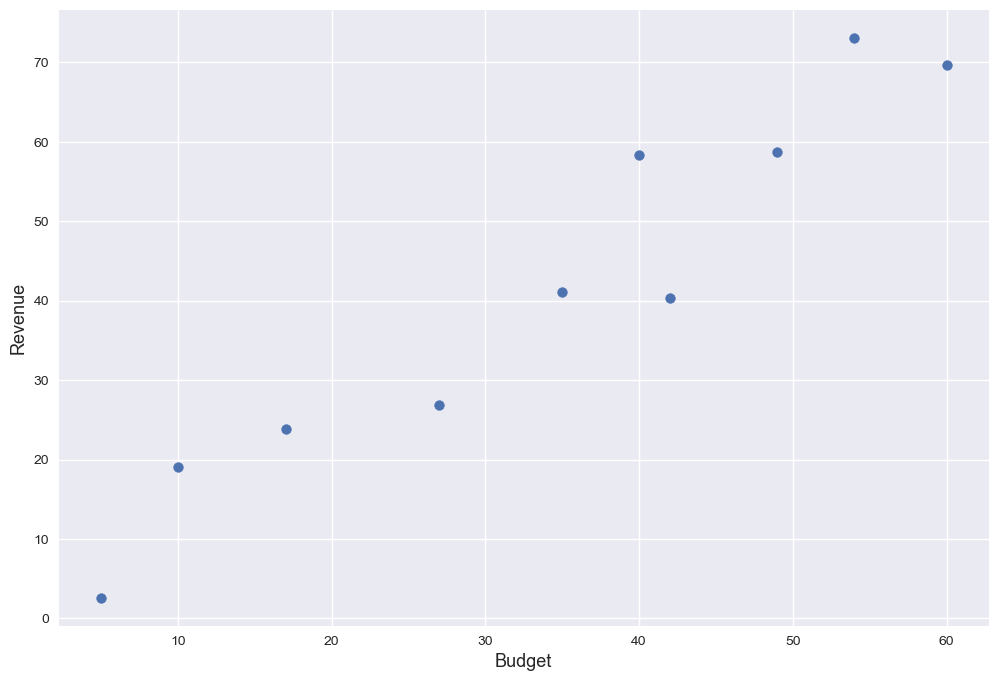

In [6]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50)
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.show()

### Linear Relationship between Budget and Revenue

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lm = LinearRegression(fit_intercept = True)

In [10]:
lm.fit(X = df.budget.to_frame(), y = df.revenue) # fitting the model (Regression Line)

LinearRegression()

In [11]:
slope = lm.coef_ # slope of Regression Line
slope

array([1.19897684])

In [12]:
intercept = lm.intercept_ # intercept of Regression Line
intercept

0.7046849757673712

In [13]:
df["pred"] = lm.predict(df.budget.to_frame())
df

,revenue,budget,pred
0,2.6,5,6.699569
1,19.0,10,12.694453
2,23.8,17,21.087291
3,26.9,27,33.077060
4,41.1,35,42.668875
5,58.3,40,48.663759
6,40.3,42,51.061712
7,58.7,49,59.454550
8,73.1,54,65.449435
9,69.7,60,72.643296


In [14]:
x_lin = np.array([0, 100])
y_lin = intercept + slope * x_lin

In [15]:
y_lin

array([  0.70468498, 120.60236941])

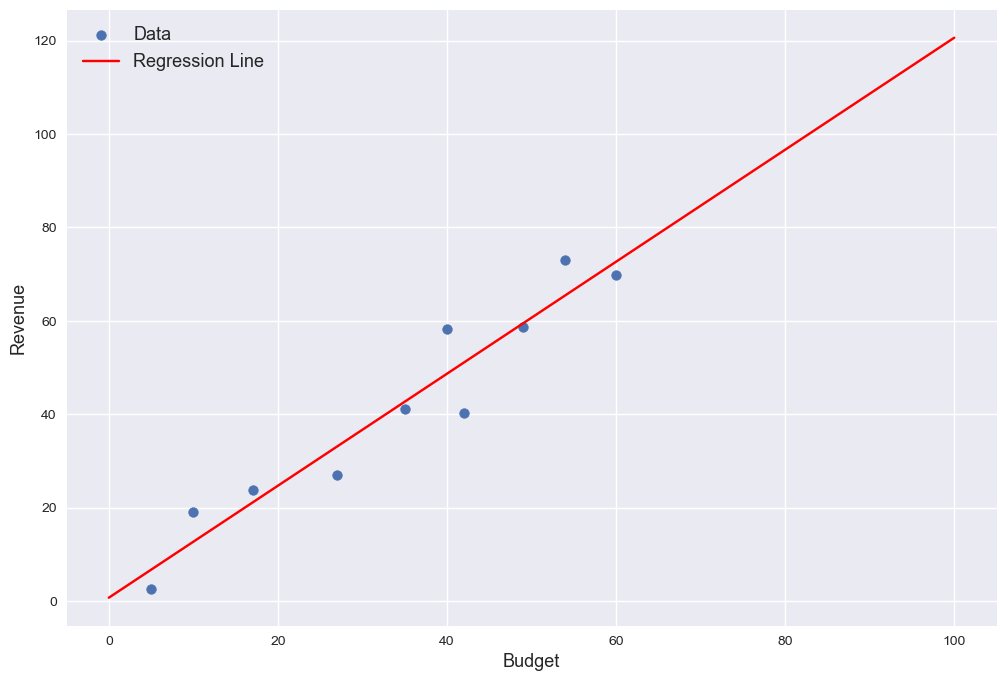

In [16]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Making Predictions with Linear Regression


In [17]:
budget_new = np.array([63, 66, 74, 80, 85]) 

In [18]:
revenue_new = np.array([74.2,  80.7, 98.2,  94.8, 101.7]) 

In [19]:
df_new = pd.DataFrame(data = {"revenue":revenue_new, "budget":budget_new})
df_new

,revenue,budget
0,74.2,63
1,80.7,66
2,98.2,74
3,94.8,80
4,101.7,85


In [20]:
df_new["pred"] = lm.predict(df_new.budget.to_frame())
df_new

,revenue,budget,pred
0,74.2,63,76.240226
1,80.7,66,79.837157
2,98.2,74,89.428971
3,94.8,80,96.622833
4,101.7,85,102.617717


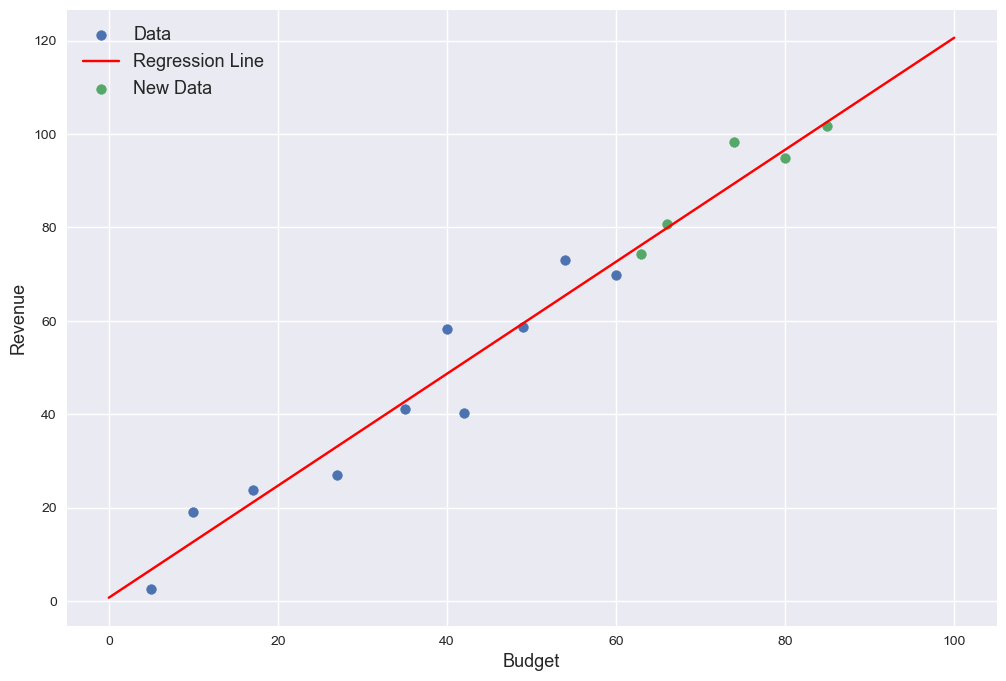

In [21]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Overfitting

__Overfitting__: Model performs well on the original (training) dataset, but it does not generalize well to new data (test set).
Overfitting happens when the __model is too complex__ (too many parameters) and detects subtle patterns (noise) in the training set. 

Example: __Polynomial Model__ with degree = 9 (perfect fit)

In [22]:
poly_m = np.polyfit(x = df.budget, y = df.revenue, deg = 9) # polynomial regression (deg = 9)

In [23]:
poly_m # 10 regression parameters (intercept + 9 regression coefficients)

array([ 2.31988762e-09, -6.91663857e-07,  8.80409588e-05, -6.24271102e-03,
        2.69731803e-01, -7.29512946e+00,  1.21996447e+02, -1.19724559e+03,
        6.13254339e+03, -1.21710591e+04])

In [24]:
x_poly = np.linspace(0, 100, 1000) # x values for polynomial regression line/curve

In [25]:
y_poly = np.polyval(poly_m, x_poly) # y values for polynomial regression line/curve

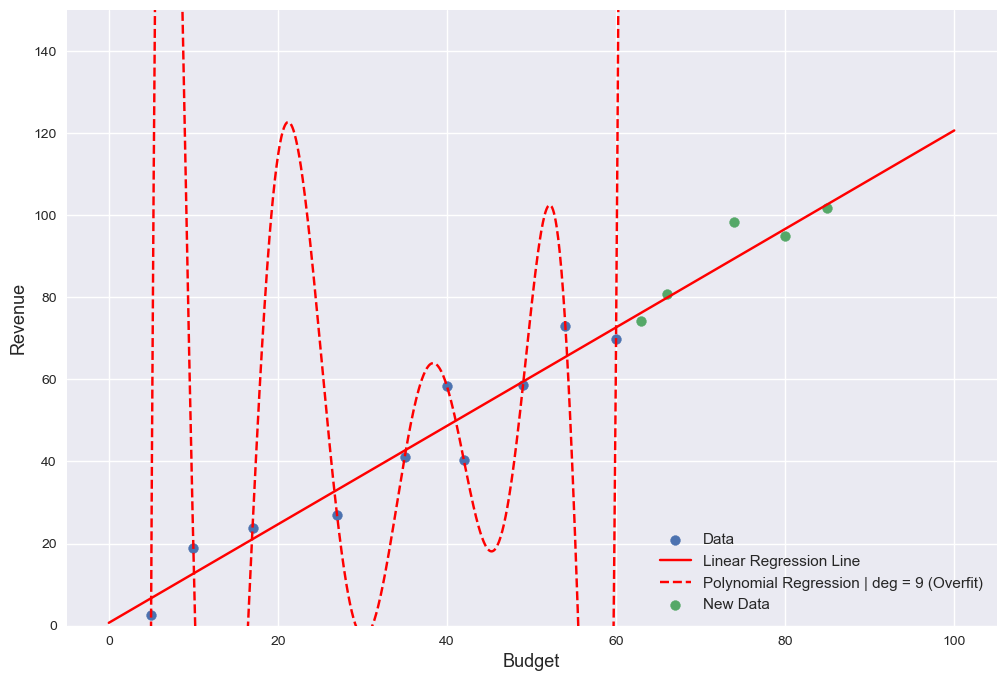

In [26]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)",linestyle = "--", color = "red")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()

__Solutions__ to overcome overfitting:


- use a __simpler model__ with fewer parameters (linear rather than polynomial)<br>
- more and better data (remove outliers & errors) <br>
- constrain the model -> make the model more simple with __Regularization__

##  Underfitting

__Underfitting__: Model performs neither well on the original (training) dataset, nor does it generalize well to new data (test set).
Underfitting happens when the __model is too simple__ to learn the underlying structure of the data.

most simple (linear) model with only one paramter: __y = a__ <br>
intercept == a (e.g. the mean)<br>
slope == 0 

In [27]:
mean = df.revenue.mean()
mean

41.35000000000001

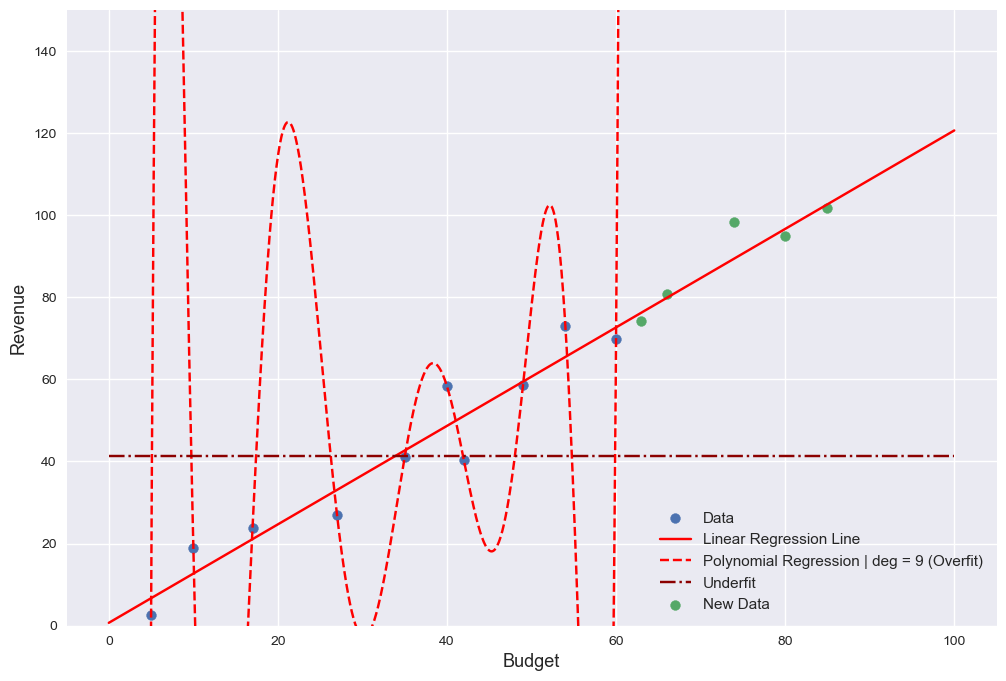

In [28]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)",linestyle = "--", color = "red")
plt.hlines(y = mean, xmin = 0, xmax = 100, linestyle = "-.", color = "darkred", label = "Underfit")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()

__Solutions__ to overcome underfitting:

- use a __more powerful model__ with more parameters<br>
- add more/better features (independent variables) to the algorithm -> Feature Engineering <br>
- reduce the constraints of the model -> make it more complex with __less Regularization__

## Simple linear model to predict financial returns

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

In [36]:
GBPUSD = yf.download('GBPUSD=x','2022-09-25','2022-11-06',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [37]:
data = pd.DataFrame(index = GBPUSD.index)
data['price'] = GBPUSD["Close"]

In [38]:
data

,price
Datetime,
2022-09-26 00:00:00+01:00,1.084211
2022-09-26 00:05:00+01:00,1.084658
2022-09-26 00:10:00+01:00,1.083424
2022-09-26 00:15:00+01:00,1.082134
2022-09-26 00:20:00+01:00,1.081888
...,...
2022-11-04 21:05:00+00:00,1.137656
2022-11-04 21:10:00+00:00,1.137656
2022-11-04 21:15:00+00:00,1.137656


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8511 entries, 2022-09-26 00:00:00+01:00 to 2022-11-04 21:25:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   8511 non-null   float64
dtypes: float64(1)
memory usage: 133.0 KB


In [40]:
data["returns"] = np.log(data.div(data.shift(1)))
data

,price,returns
Datetime,,
2022-09-26 00:00:00+01:00,1.084211,NaN
2022-09-26 00:05:00+01:00,1.084658,0.000412
2022-09-26 00:10:00+01:00,1.083424,-0.001138
2022-09-26 00:15:00+01:00,1.082134,-0.001191
2022-09-26 00:20:00+01:00,1.081888,-0.000227
...,...,...
2022-11-04 21:05:00+00:00,1.137656,0.000000
2022-11-04 21:10:00+00:00,1.137656,0.000000
2022-11-04 21:15:00+00:00,1.137656,0.000000


In [41]:
data["lag1"] = data.returns.shift(1)
data

,price,returns,lag1
Datetime,,,
2022-09-26 00:00:00+01:00,1.084211,NaN,NaN
2022-09-26 00:05:00+01:00,1.084658,0.000412,NaN
2022-09-26 00:10:00+01:00,1.083424,-0.001138,0.000412
2022-09-26 00:15:00+01:00,1.082134,-0.001191,-0.001138
2022-09-26 00:20:00+01:00,1.081888,-0.000227,-0.001191
...,...,...,...
2022-11-04 21:05:00+00:00,1.137656,0.000000,0.000330
2022-11-04 21:10:00+00:00,1.137656,0.000000,0.000000
2022-11-04 21:15:00+00:00,1.137656,0.000000,0.000000


In [42]:
data.dropna(inplace = True)

In [43]:
data

,price,returns,lag1
Datetime,,,
2022-09-26 00:10:00+01:00,1.083424,-0.001138,0.000412
2022-09-26 00:15:00+01:00,1.082134,-0.001191,-0.001138
2022-09-26 00:20:00+01:00,1.081888,-0.000227,-0.001191
2022-09-26 00:25:00+01:00,1.082649,0.000704,-0.000227
2022-09-26 00:30:00+01:00,1.082978,0.000303,0.000704
...,...,...,...
2022-11-04 21:05:00+00:00,1.137656,0.000000,0.000330
2022-11-04 21:10:00+00:00,1.137656,0.000000,0.000000
2022-11-04 21:15:00+00:00,1.137656,0.000000,0.000000


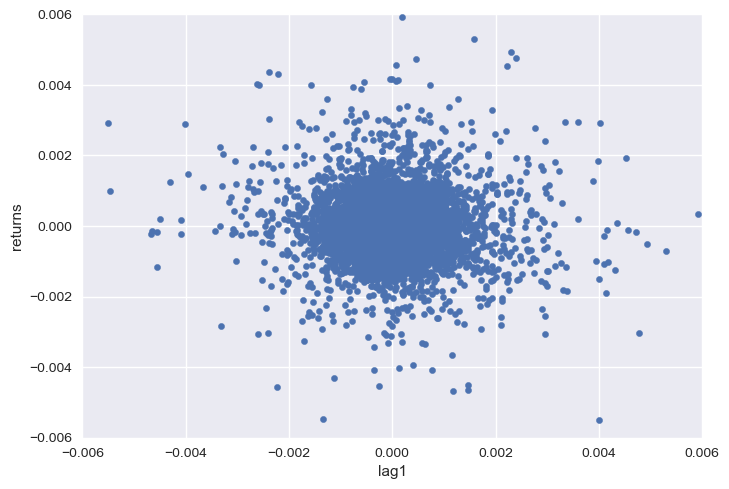

In [46]:
data.iloc[:, -2:].plot(kind = "scatter", x = "lag1", y = "returns")
plt.xlim(-0.006, 0.006)
plt.ylim(-0.006, 0.006)
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lm = LinearRegression(fit_intercept = True)

In [49]:
lm.fit(data.lag1.to_frame(), data.returns)

LinearRegression()

In [50]:
slope = lm.coef_
slope

array([-0.08984792])

In [51]:
intercept = lm.intercept_
intercept

6.114632337105989e-06

In [52]:
data["pred"] = lm.predict(data.lag1.to_frame())

In [53]:
data

,price,returns,lag1,pred
Datetime,,,,
2022-09-26 00:10:00+01:00,1.083424,-0.001138,0.000412,-0.000031
2022-09-26 00:15:00+01:00,1.082134,-0.001191,-0.001138,0.000108
2022-09-26 00:20:00+01:00,1.081888,-0.000227,-0.001191,0.000113
2022-09-26 00:25:00+01:00,1.082649,0.000704,-0.000227,0.000027
2022-09-26 00:30:00+01:00,1.082978,0.000303,0.000704,-0.000057
...,...,...,...,...
2022-11-04 21:05:00+00:00,1.137656,0.000000,0.000330,-0.000024
2022-11-04 21:10:00+00:00,1.137656,0.000000,0.000000,0.000006
2022-11-04 21:15:00+00:00,1.137656,0.000000,0.000000,0.000006


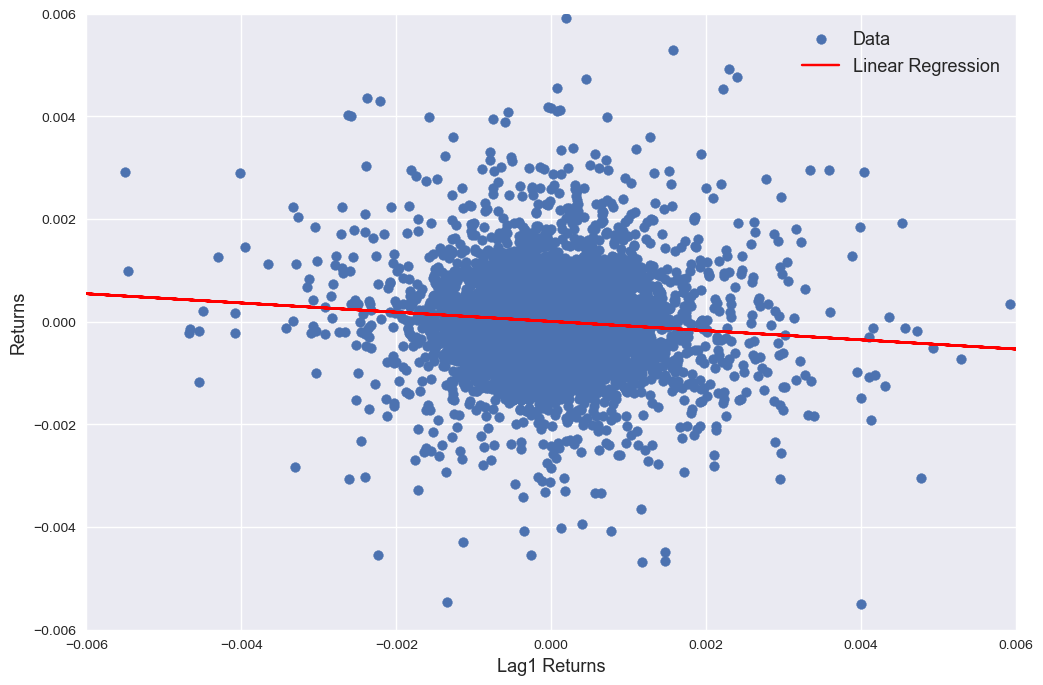

In [55]:
plt.figure(figsize = (12, 8))
plt.scatter(x = data.lag1, y = data.returns, label = "Data")
plt.plot(data.lag1, data.pred, c = "red", label = "Linear Regression")
plt.xlim(-0.006, 0.006)
plt.ylim(-0.006, 0.006)
plt.legend(fontsize = 13)
plt.xlabel("Lag1 Returns", fontsize = 13)
plt.ylabel("Returns", fontsize = 13)
plt.show()

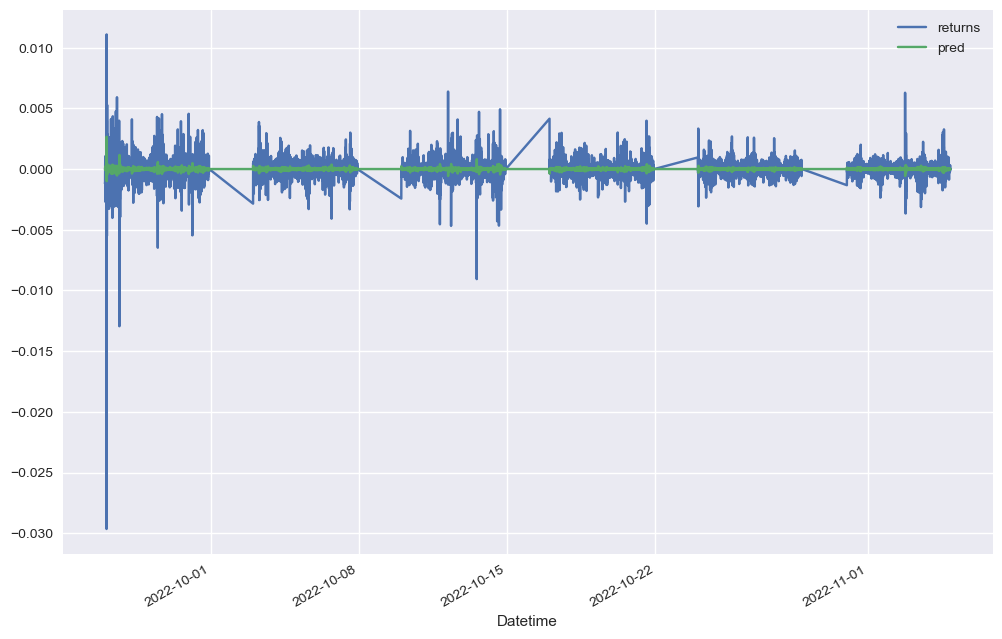

In [56]:
data[["returns", "pred"]].plot(figsize = (12, 8))
plt.show() # model fails to predict the magnitude of returns

In [57]:
data.pred = np.sign(data.pred) # maybe the model can predict the market direction (-1 / +1)

In [58]:
data

,price,returns,lag1,pred
Datetime,,,,
2022-09-26 00:10:00+01:00,1.083424,-0.001138,0.000412,-1.0
2022-09-26 00:15:00+01:00,1.082134,-0.001191,-0.001138,1.0
2022-09-26 00:20:00+01:00,1.081888,-0.000227,-0.001191,1.0
2022-09-26 00:25:00+01:00,1.082649,0.000704,-0.000227,1.0
2022-09-26 00:30:00+01:00,1.082978,0.000303,0.000704,-1.0
...,...,...,...,...
2022-11-04 21:05:00+00:00,1.137656,0.000000,0.000330,-1.0
2022-11-04 21:10:00+00:00,1.137656,0.000000,0.000000,1.0
2022-11-04 21:15:00+00:00,1.137656,0.000000,0.000000,1.0


In [59]:
np.sign(data.returns * data.pred)

Datetime
2022-09-26 00:10:00+01:00    1.0
2022-09-26 00:15:00+01:00   -1.0
2022-09-26 00:20:00+01:00   -1.0
2022-09-26 00:25:00+01:00    1.0
2022-09-26 00:30:00+01:00   -1.0
                            ... 
2022-11-04 21:05:00+00:00    0.0
2022-11-04 21:10:00+00:00    0.0
2022-11-04 21:15:00+00:00    0.0
2022-11-04 21:20:00+00:00    0.0
2022-11-04 21:25:00+00:00    0.0
Length: 8509, dtype: float64

In [60]:
hits = np.sign(data.returns * data.pred).value_counts()

In [61]:
hits

 1.0    4387
-1.0    4015
 0.0     107
dtype: int64

In [62]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio # percentage of correctly forecasted market directions 

0.5155717475614056

## A Multiple Regression Model to predict Financial Returns

__Adding more Features - a multiple Regression Model__

In [86]:
GBPUSD = yf.download('GBPUSD=x','2022-09-25','2022-10-20',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [87]:
data = pd.DataFrame(index = GBPUSD.index)
data['price'] = GBPUSD["Close"]

In [88]:
data["returns"] = np.log(data.div(data.shift(1)))

In [89]:
lags = 5

In [90]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [91]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5
Datetime,,,,,,,
2022-09-26 00:30:00+01:00,1.082978,0.000303,0.000704,-0.000227,-0.001191,-0.001138,0.000412
2022-09-26 00:35:00+01:00,1.081081,-0.001753,0.000303,0.000704,-0.000227,-0.001191,-0.001138
2022-09-26 00:40:00+01:00,1.078167,-0.002699,-0.001753,0.000303,0.000704,-0.000227,-0.001191
2022-09-26 00:45:00+01:00,1.079296,0.001046,-0.002699,-0.001753,0.000303,0.000704,-0.000227
2022-09-26 00:50:00+01:00,1.080474,0.001091,0.001046,-0.002699,-0.001753,0.000303,0.000704
...,...,...,...,...,...,...,...
2022-10-19 23:35:00+01:00,1.121781,-0.000067,-0.000247,0.000236,-0.000213,-0.000034,0.000146
2022-10-19 23:40:00+01:00,1.120976,-0.000718,-0.000067,-0.000247,0.000236,-0.000213,-0.000034
2022-10-19 23:45:00+01:00,1.121227,0.000224,-0.000718,-0.000067,-0.000247,0.000236,-0.000213


In [92]:
lm = LinearRegression(fit_intercept = True)

In [93]:
lm.fit(data[cols], data.returns)

LinearRegression()

In [94]:
lm.coef_

array([-0.10874156,  0.00714173,  0.03736962, -0.00943355,  0.00737282])

In [95]:
lm.intercept_

7.2881351940941555e-06

In [96]:
data["pred"] = lm.predict(data[cols].values)

/Users/ad06/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [97]:
data.pred = np.sign(data.pred)

In [98]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
Datetime,,,,,,,,
2022-09-26 00:30:00+01:00,1.082978,0.000303,0.000704,-0.000227,-0.001191,-0.001138,0.000412,-1.0
2022-09-26 00:35:00+01:00,1.081081,-0.001753,0.000303,0.000704,-0.000227,-0.001191,-0.001138,-1.0
2022-09-26 00:40:00+01:00,1.078167,-0.002699,-0.001753,0.000303,0.000704,-0.000227,-0.001191,1.0
2022-09-26 00:45:00+01:00,1.079296,0.001046,-0.002699,-0.001753,0.000303,0.000704,-0.000227,1.0
2022-09-26 00:50:00+01:00,1.080474,0.001091,0.001046,-0.002699,-0.001753,0.000303,0.000704,-1.0
...,...,...,...,...,...,...,...,...
2022-10-19 23:35:00+01:00,1.121781,-0.000067,-0.000247,0.000236,-0.000213,-0.000034,0.000146,1.0
2022-10-19 23:40:00+01:00,1.120976,-0.000718,-0.000067,-0.000247,0.000236,-0.000213,-0.000034,1.0
2022-10-19 23:45:00+01:00,1.121227,0.000224,-0.000718,-0.000067,-0.000247,0.000236,-0.000213,1.0


In [99]:
data.pred.value_counts()

 1.0    2781
-1.0    2343
Name: pred, dtype: int64

In [100]:
hit = np.sign(data.returns * data.pred).value_counts()

In [101]:
hit

 1.0    2664
-1.0    2397
 0.0      63
dtype: int64

In [102]:
it_ratio = hit[1.0] / sum(hit)
hit_ratio

0.5155717475614056

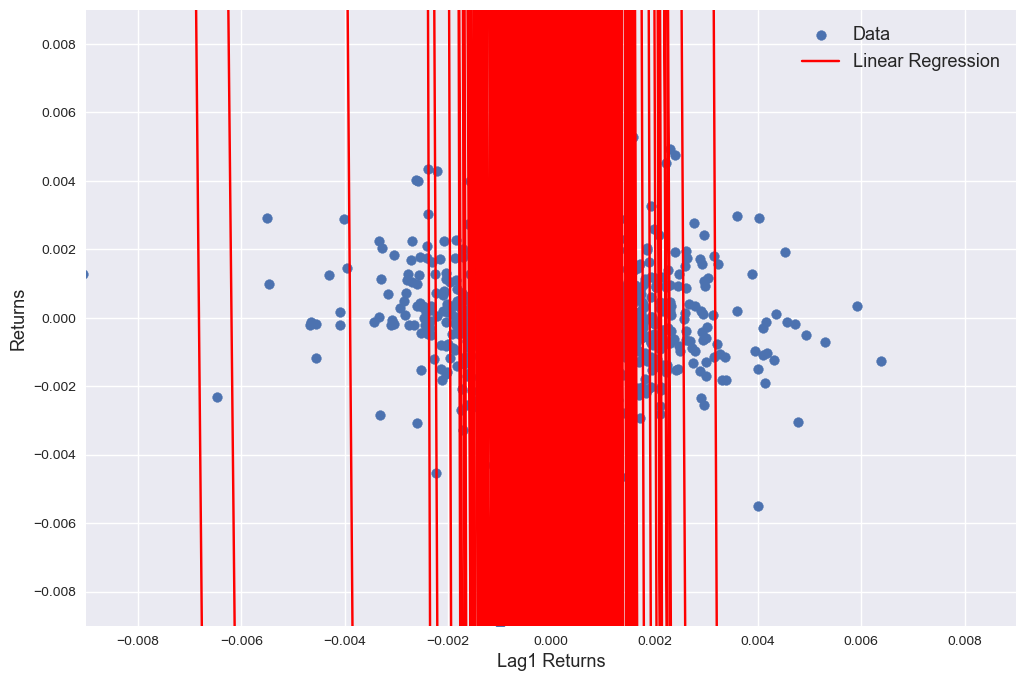

In [103]:
plt.figure(figsize = (12, 8))
plt.scatter(x = data.lag1, y = data.returns, label = "Data")
plt.plot(data.lag1, data.pred, c = "red", label = "Linear Regression")
plt.xlim(-0.009, 0.009)
plt.ylim(-0.009, 0.009)
plt.legend(fontsize = 13)
plt.xlabel("Lag1 Returns", fontsize = 13)
plt.ylabel("Returns", fontsize = 13)
plt.show()

## In sample backtesting

In [104]:
data["strategy"] = data.pred * data.returns

In [105]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

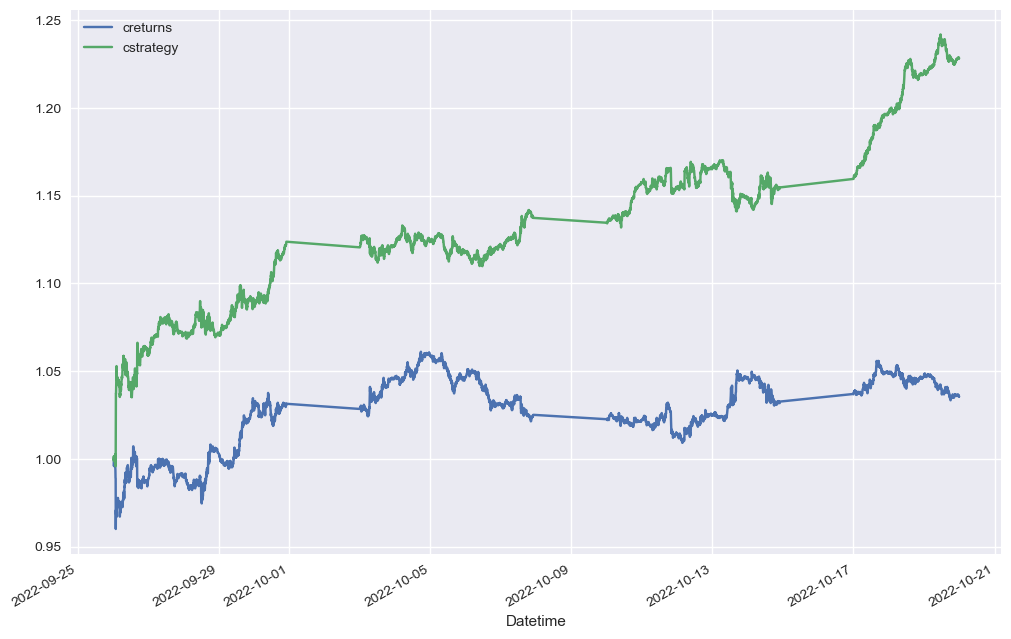

In [106]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

## Out Sample Forward Testing

In [107]:
GBPUSD = yf.download('GBPUSD=x','2022-10-24','2022-11-10',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [108]:
data = pd.DataFrame(index = GBPUSD.index)
data['price'] = GBPUSD["Close"]

In [109]:
data["returns"] = np.log(data.div(data.shift(1)))

In [110]:
lags = 5

In [111]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [112]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5
Datetime,,,,,,,
2022-10-24 00:30:00+01:00,1.131132,0.000124,-0.000317,-0.000328,0.000079,0.000011,0.000294
2022-10-24 00:35:00+01:00,1.134919,0.003342,0.000124,-0.000317,-0.000328,0.000079,0.000011
2022-10-24 00:40:00+01:00,1.138278,0.002955,0.003342,0.000124,-0.000317,-0.000328,0.000079
2022-10-24 00:45:00+01:00,1.134790,-0.003069,0.002955,0.003342,0.000124,-0.000317,-0.000328
2022-10-24 00:50:00+01:00,1.135267,0.000420,-0.003069,0.002955,0.003342,0.000124,-0.000317
...,...,...,...,...,...,...,...
2022-11-09 23:35:00+00:00,1.136351,-0.000125,0.000409,-0.000238,0.000261,0.000329,0.000057
2022-11-09 23:40:00+00:00,1.136544,0.000170,-0.000125,0.000409,-0.000238,0.000261,0.000329
2022-11-09 23:45:00+00:00,1.136596,0.000045,0.000170,-0.000125,0.000409,-0.000238,0.000261


In [113]:
data["pred"] = lm.predict(data[cols].values)

/Users/ad06/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [114]:
data.pred = np.sign(data.pred)

In [115]:
hits = np.sign(data.returns * data.pred).value_counts()

In [116]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5104591143710948

In [117]:
data["strategy"] = data.pred * data.returns

In [118]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

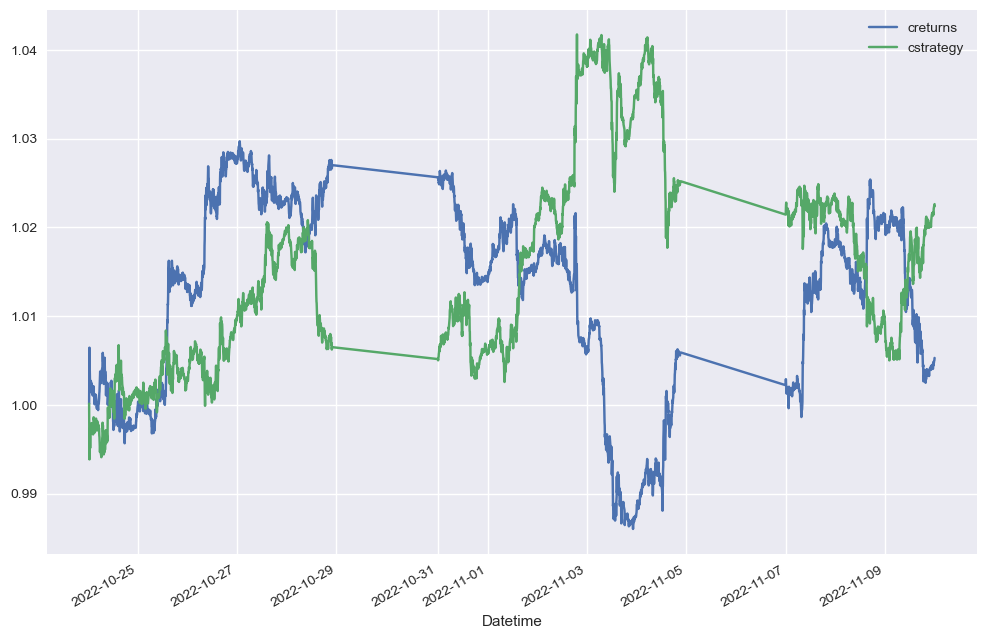

In [119]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

## Classification

In [120]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [121]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) 

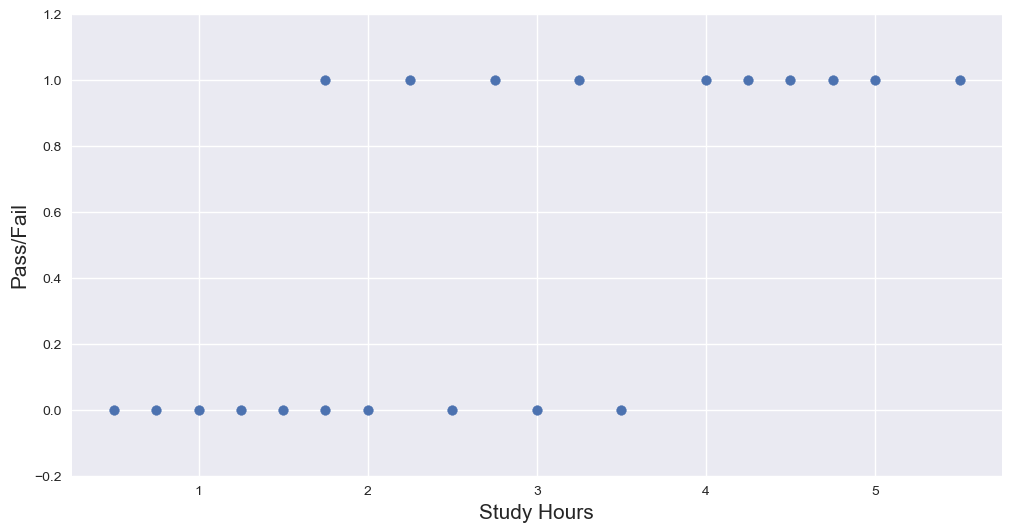

In [122]:
plt.figure(figsize=(12, 6))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.show()

In [123]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [124]:
data

,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lm = LinearRegression(fit_intercept= True)

In [127]:
lm.fit(data.hours.to_frame(), data.success)

LinearRegression()

In [128]:
lm.coef_

array([0.23459561])

In [129]:
lm.intercept_

-0.1539352689884873

In [130]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


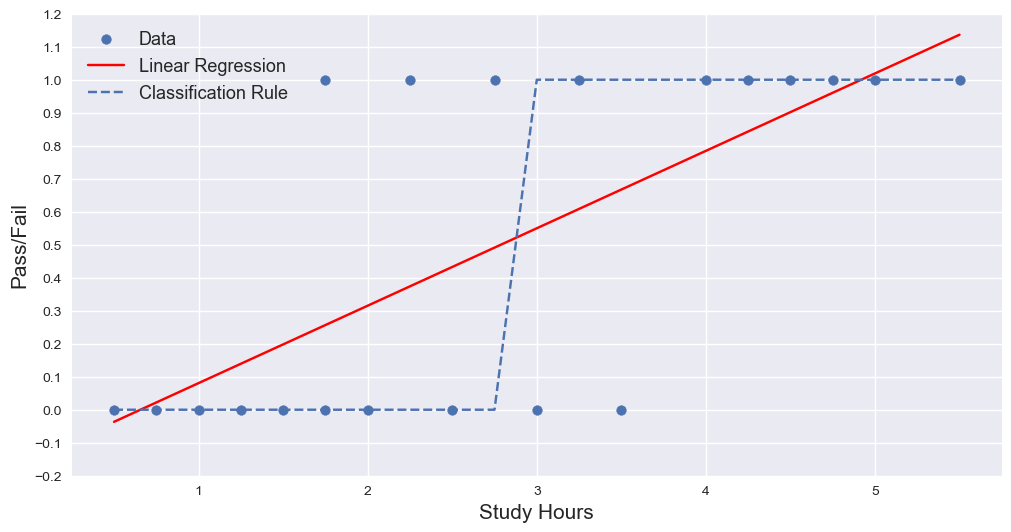

In [131]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Linear Regression")
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle = "--", label = "Classification Rule")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
lm = LogisticRegression()

In [134]:
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


In [135]:
lm.fit(data.hours.to_frame(), data.success)

LogisticRegression()

In [136]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


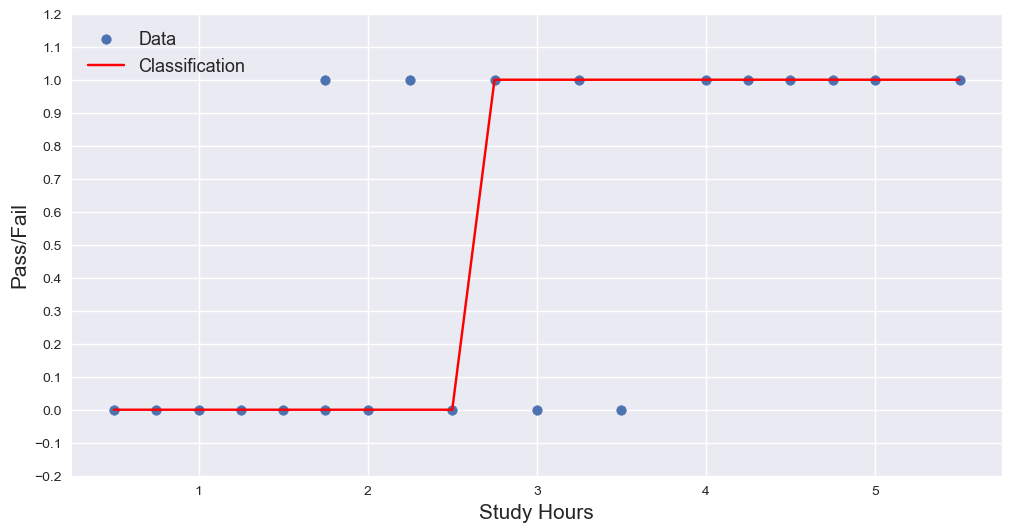

In [137]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

In [138]:
proba = lm.predict_proba(data.hours.to_frame())
proba

array([[0.92858952, 0.07141048],
       [0.90704455, 0.09295545],
       [0.87984046, 0.12015954],
       [0.84602638, 0.15397362],
       [0.80480773, 0.19519227],
       [0.75574059, 0.24425941],
       [0.75574059, 0.24425941],
       [0.69895285, 0.30104715],
       [0.63533317, 0.36466683],
       [0.56660539, 0.43339461],
       [0.49521602, 0.50478398],
       [0.42402118, 0.57597882],
       [0.3558463 , 0.6441537 ],
       [0.29305565, 0.70694435],
       [0.18924992, 0.81075008],
       [0.14905371, 0.85094629],
       [0.11617173, 0.88382827],
       [0.08977835, 0.91022165],
       [0.06891381, 0.93108619],
       [0.04000986, 0.95999014]])

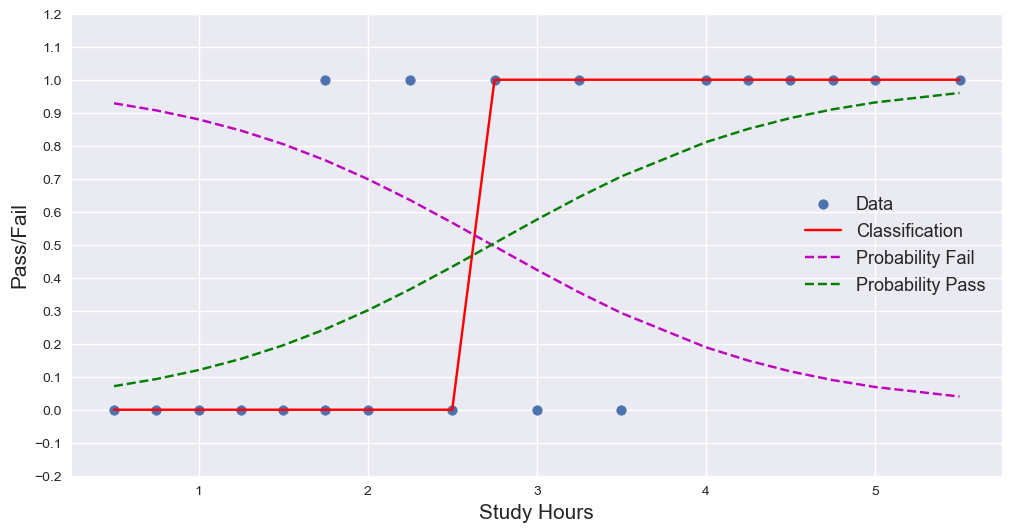

In [139]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.plot(data.hours, proba[:, 0], "m--", label = "Probability Fail")
plt.plot(data.hours, proba[:, 1], "g--", label = "Probability Pass")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

## A Logistic Regression Model to generate signals

In [225]:
GBPUSD = yf.download('GBPUSD=x','2022-10-05','2022-11-01',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [226]:
data = pd.DataFrame(index = GBPUSD.index)
data['price'] = GBPUSD["Close"]

In [227]:
data["returns"] = np.log(data.div(data.shift(1)))

In [228]:
data.dropna(inplace = True)

In [229]:
data["direction"] = np.sign(data.returns)

In [230]:
data

,price,returns,direction
Datetime,,,
2022-10-05 00:05:00+01:00,1.146092,0.000092,1.0
2022-10-05 00:10:00+01:00,1.146079,-0.000011,-1.0
2022-10-05 00:15:00+01:00,1.146106,0.000023,1.0
2022-10-05 00:20:00+01:00,1.146066,-0.000034,-1.0
2022-10-05 00:25:00+01:00,1.145580,-0.000424,-1.0
...,...,...,...
2022-10-31 23:35:00+00:00,1.146881,0.000012,1.0
2022-10-31 23:40:00+00:00,1.147013,0.000115,1.0
2022-10-31 23:45:00+00:00,1.147328,0.000275,1.0


In [231]:
data.direction.value_counts()

-1.0    2700
 1.0    2619
 0.0      71
Name: direction, dtype: int64

In [234]:
lags = 100

In [235]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [236]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,lag6,lag7,...,lag991,lag992,lag993,lag994,lag995,lag996,lag997,lag998,lag999,lag1000
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-10-10 21:15:00+01:00,1.105877,0.000011,1.0,0.000464,-0.000332,0.000011,-0.000520,-0.000155,0.000232,-0.000199,...,-0.000593,0.000057,0.000582,0.000000,-0.000924,-0.000194,-0.000811,-0.000446,0.000080,-0.000583
2022-10-10 21:20:00+01:00,1.105754,-0.000111,-1.0,0.000011,0.000464,-0.000332,0.000011,-0.000520,-0.000155,0.000232,...,-0.001140,-0.000593,0.000057,0.000582,0.000000,-0.000924,-0.000194,-0.000811,-0.000446,0.000080
2022-10-10 21:25:00+01:00,1.105938,0.000166,1.0,-0.000111,0.000011,0.000464,-0.000332,0.000011,-0.000520,-0.000155,...,-0.000592,-0.001140,-0.000593,0.000057,0.000582,0.000000,-0.000924,-0.000194,-0.000811,-0.000446
2022-10-10 21:30:00+01:00,1.106036,0.000088,1.0,0.000166,-0.000111,0.000011,0.000464,-0.000332,0.000011,-0.000520,...,0.000421,-0.000592,-0.001140,-0.000593,0.000057,0.000582,0.000000,-0.000924,-0.000194,-0.000811
2022-10-10 21:35:00+01:00,1.106011,-0.000022,-1.0,0.000088,0.000166,-0.000111,0.000011,0.000464,-0.000332,0.000011,...,0.001470,0.000421,-0.000592,-0.001140,-0.000593,0.000057,0.000582,0.000000,-0.000924,-0.000194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 23:35:00+00:00,1.146881,0.000012,1.0,-0.000275,-0.000161,-0.000057,0.000069,0.000161,0.000046,0.000000,...,0.000116,-0.000173,-0.000647,-0.000798,-0.000799,0.000718,0.000220,-0.000614,0.000208,-0.000116
2022-10-31 23:40:00+00:00,1.147013,0.000115,1.0,0.000012,-0.000275,-0.000161,-0.000057,0.000069,0.000161,0.000046,...,0.000693,0.000116,-0.000173,-0.000647,-0.000798,-0.000799,0.000718,0.000220,-0.000614,0.000208
2022-10-31 23:45:00+00:00,1.147328,0.000275,1.0,0.000115,0.000012,-0.000275,-0.000161,-0.000057,0.000069,0.000161,...,-0.000023,0.000693,0.000116,-0.000173,-0.000647,-0.000798,-0.000799,0.000718,0.000220,-0.000614


In [237]:
lm = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr")

In [238]:
lm.fit(data[cols], data.direction)

LogisticRegression(C=1000000.0, max_iter=100000, multi_class='ovr')

In [239]:
data["pred"] = lm.predict(data[cols])

In [240]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,lag6,lag7,...,lag992,lag993,lag994,lag995,lag996,lag997,lag998,lag999,lag1000,pred
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-10-10 21:15:00+01:00,1.105877,0.000011,1.0,0.000464,-0.000332,0.000011,-0.000520,-0.000155,0.000232,-0.000199,...,0.000057,0.000582,0.000000,-0.000924,-0.000194,-0.000811,-0.000446,0.000080,-0.000583,-1.0
2022-10-10 21:20:00+01:00,1.105754,-0.000111,-1.0,0.000011,0.000464,-0.000332,0.000011,-0.000520,-0.000155,0.000232,...,-0.000593,0.000057,0.000582,0.000000,-0.000924,-0.000194,-0.000811,-0.000446,0.000080,-1.0
2022-10-10 21:25:00+01:00,1.105938,0.000166,1.0,-0.000111,0.000011,0.000464,-0.000332,0.000011,-0.000520,-0.000155,...,-0.001140,-0.000593,0.000057,0.000582,0.000000,-0.000924,-0.000194,-0.000811,-0.000446,1.0
2022-10-10 21:30:00+01:00,1.106036,0.000088,1.0,0.000166,-0.000111,0.000011,0.000464,-0.000332,0.000011,-0.000520,...,-0.000592,-0.001140,-0.000593,0.000057,0.000582,0.000000,-0.000924,-0.000194,-0.000811,-1.0
2022-10-10 21:35:00+01:00,1.106011,-0.000022,-1.0,0.000088,0.000166,-0.000111,0.000011,0.000464,-0.000332,0.000011,...,0.000421,-0.000592,-0.001140,-0.000593,0.000057,0.000582,0.000000,-0.000924,-0.000194,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 23:35:00+00:00,1.146881,0.000012,1.0,-0.000275,-0.000161,-0.000057,0.000069,0.000161,0.000046,0.000000,...,-0.000173,-0.000647,-0.000798,-0.000799,0.000718,0.000220,-0.000614,0.000208,-0.000116,-1.0
2022-10-31 23:40:00+00:00,1.147013,0.000115,1.0,0.000012,-0.000275,-0.000161,-0.000057,0.000069,0.000161,0.000046,...,0.000116,-0.000173,-0.000647,-0.000798,-0.000799,0.000718,0.000220,-0.000614,0.000208,-1.0
2022-10-31 23:45:00+00:00,1.147328,0.000275,1.0,0.000115,0.000012,-0.000275,-0.000161,-0.000057,0.000069,0.000161,...,0.000693,0.000116,-0.000173,-0.000647,-0.000798,-0.000799,0.000718,0.000220,-0.000614,1.0


In [241]:
data.pred.value_counts()

-1.0    2297
 1.0    1993
Name: pred, dtype: int64

In [242]:
hits = np.sign(data.direction * data.pred).value_counts()

In [243]:
hits

 1.0    2369
-1.0    1864
 0.0      57
dtype: int64

In [244]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5522144522144522

In [245]:
from sklearn.metrics import accuracy_score

In [246]:
accuracy_score(y_true = data.direction, y_pred = data.pred)

0.5522144522144522

## In Sample Back Testing

In [247]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,lag6,lag7,...,lag992,lag993,lag994,lag995,lag996,lag997,lag998,lag999,lag1000,pred
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-10-10 21:15:00+01:00,1.105877,0.000011,1.0,0.000464,-0.000332,0.000011,-0.000520,-0.000155,0.000232,-0.000199,...,0.000057,0.000582,0.000000,-0.000924,-0.000194,-0.000811,-0.000446,0.000080,-0.000583,-1.0
2022-10-10 21:20:00+01:00,1.105754,-0.000111,-1.0,0.000011,0.000464,-0.000332,0.000011,-0.000520,-0.000155,0.000232,...,-0.000593,0.000057,0.000582,0.000000,-0.000924,-0.000194,-0.000811,-0.000446,0.000080,-1.0
2022-10-10 21:25:00+01:00,1.105938,0.000166,1.0,-0.000111,0.000011,0.000464,-0.000332,0.000011,-0.000520,-0.000155,...,-0.001140,-0.000593,0.000057,0.000582,0.000000,-0.000924,-0.000194,-0.000811,-0.000446,1.0
2022-10-10 21:30:00+01:00,1.106036,0.000088,1.0,0.000166,-0.000111,0.000011,0.000464,-0.000332,0.000011,-0.000520,...,-0.000592,-0.001140,-0.000593,0.000057,0.000582,0.000000,-0.000924,-0.000194,-0.000811,-1.0
2022-10-10 21:35:00+01:00,1.106011,-0.000022,-1.0,0.000088,0.000166,-0.000111,0.000011,0.000464,-0.000332,0.000011,...,0.000421,-0.000592,-0.001140,-0.000593,0.000057,0.000582,0.000000,-0.000924,-0.000194,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 23:35:00+00:00,1.146881,0.000012,1.0,-0.000275,-0.000161,-0.000057,0.000069,0.000161,0.000046,0.000000,...,-0.000173,-0.000647,-0.000798,-0.000799,0.000718,0.000220,-0.000614,0.000208,-0.000116,-1.0
2022-10-31 23:40:00+00:00,1.147013,0.000115,1.0,0.000012,-0.000275,-0.000161,-0.000057,0.000069,0.000161,0.000046,...,0.000116,-0.000173,-0.000647,-0.000798,-0.000799,0.000718,0.000220,-0.000614,0.000208,-1.0
2022-10-31 23:45:00+00:00,1.147328,0.000275,1.0,0.000115,0.000012,-0.000275,-0.000161,-0.000057,0.000069,0.000161,...,0.000693,0.000116,-0.000173,-0.000647,-0.000798,-0.000799,0.000718,0.000220,-0.000614,1.0


In [248]:
data["strategy"] = data.pred * data.returns

In [249]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

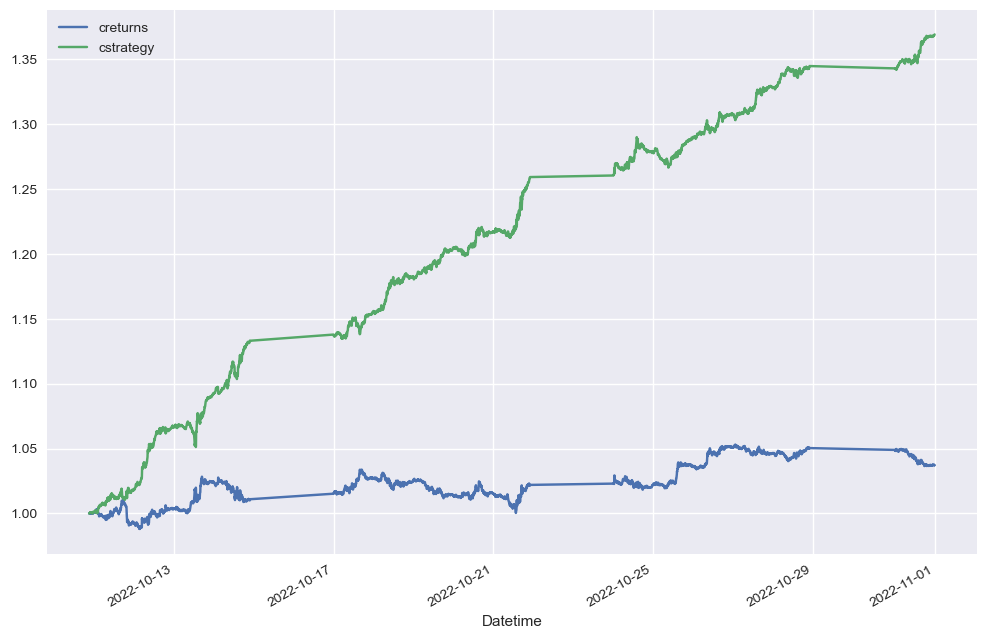

In [250]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [251]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [252]:
data.trades.value_counts()

0.0    2171
2.0    2119
Name: trades, dtype: int64

In [253]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,lag6,lag7,...,lag996,lag997,lag998,lag999,lag1000,pred,strategy,creturns,cstrategy,trades
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-10-10 21:15:00+01:00,1.105877,0.000011,1.0,0.000464,-0.000332,0.000011,-0.000520,-0.000155,0.000232,-0.000199,...,-0.000194,-0.000811,-0.000446,0.000080,-0.000583,-1.0,-0.000011,1.000011,0.999989,0.0
2022-10-10 21:20:00+01:00,1.105754,-0.000111,-1.0,0.000011,0.000464,-0.000332,0.000011,-0.000520,-0.000155,0.000232,...,-0.000924,-0.000194,-0.000811,-0.000446,0.000080,-1.0,0.000111,0.999901,1.000100,0.0
2022-10-10 21:25:00+01:00,1.105938,0.000166,1.0,-0.000111,0.000011,0.000464,-0.000332,0.000011,-0.000520,-0.000155,...,0.000000,-0.000924,-0.000194,-0.000811,-0.000446,1.0,0.000166,1.000066,1.000265,2.0
2022-10-10 21:30:00+01:00,1.106036,0.000088,1.0,0.000166,-0.000111,0.000011,0.000464,-0.000332,0.000011,-0.000520,...,0.000582,0.000000,-0.000924,-0.000194,-0.000811,-1.0,-0.000088,1.000155,1.000177,2.0
2022-10-10 21:35:00+01:00,1.106011,-0.000022,-1.0,0.000088,0.000166,-0.000111,0.000011,0.000464,-0.000332,0.000011,...,0.000057,0.000582,0.000000,-0.000924,-0.000194,-1.0,0.000022,1.000133,1.000199,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 23:35:00+00:00,1.146881,0.000012,1.0,-0.000275,-0.000161,-0.000057,0.000069,0.000161,0.000046,0.000000,...,0.000718,0.000220,-0.000614,0.000208,-0.000116,-1.0,-0.000012,1.037090,1.368348,0.0
2022-10-31 23:40:00+00:00,1.147013,0.000115,1.0,0.000012,-0.000275,-0.000161,-0.000057,0.000069,0.000161,0.000046,...,-0.000799,0.000718,0.000220,-0.000614,0.000208,-1.0,-0.000115,1.037209,1.368191,0.0
2022-10-31 23:45:00+00:00,1.147328,0.000275,1.0,0.000115,0.000012,-0.000275,-0.000161,-0.000057,0.000069,0.000161,...,-0.000798,-0.000799,0.000718,0.000220,-0.000614,1.0,0.000275,1.037495,1.368568,2.0


## Out Sample Forward Testing

In [254]:
GBPUSD = yf.download('GBPUSD=x','2022-10-25','2022-11-08',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [255]:
data = pd.DataFrame(index = GBPUSD.index)
data['price'] = GBPUSD["Close"]

In [256]:
data["returns"] = np.log(data.div(data.shift(1)))

In [257]:
data["direction"] = np.sign(data.returns)

In [258]:
data

,price,returns,direction
Datetime,,,
2022-10-25 00:00:00+01:00,1.130889,NaN,NaN
2022-10-25 00:05:00+01:00,1.130991,0.000091,1.0
2022-10-25 00:10:00+01:00,1.131401,0.000362,1.0
2022-10-25 00:15:00+01:00,1.131119,-0.000249,-1.0
2022-10-25 00:20:00+01:00,1.131158,0.000034,1.0
...,...,...,...
2022-11-07 23:35:00+00:00,1.151225,0.000104,1.0
2022-11-07 23:40:00+00:00,1.151424,0.000173,1.0
2022-11-07 23:45:00+00:00,1.151835,0.000357,1.0


In [263]:
lags = 100

In [264]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

/var/folders/v8/rtxdkvyx371fs5zqdb3lhky40000gp/T/ipykernel_21202/1941301512.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data.returns.shift(lag)


In [265]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,lag6,lag7,...,lag91,lag92,lag93,lag94,lag95,lag96,lag97,lag98,lag99,lag100
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-10-25 08:50:00+01:00,1.129561,0.000181,1.0,-0.000949,0.000023,0.000430,0.000723,0.000102,0.000260,0.000869,...,0.000023,-0.000317,0.000995,-0.000486,-0.000181,-0.000102,0.000102,0.000204,0.000102,-0.000203
2022-10-25 08:55:00+01:00,1.129548,-0.000011,-1.0,0.000181,-0.000949,0.000023,0.000430,0.000723,0.000102,0.000260,...,-0.000158,0.000023,-0.000317,0.000995,-0.000486,-0.000181,-0.000102,0.000102,0.000204,0.000102
2022-10-25 09:00:00+01:00,1.130493,0.000836,1.0,-0.000011,0.000181,-0.000949,0.000023,0.000430,0.000723,0.000102,...,0.000905,-0.000158,0.000023,-0.000317,0.000995,-0.000486,-0.000181,-0.000102,0.000102,0.000204
2022-10-25 09:05:00+01:00,1.131747,0.001108,1.0,0.000836,-0.000011,0.000181,-0.000949,0.000023,0.000430,0.000723,...,0.000113,0.000905,-0.000158,0.000023,-0.000317,0.000995,-0.000486,-0.000181,-0.000102,0.000102
2022-10-25 09:10:00+01:00,1.131670,-0.000068,-1.0,0.001108,0.000836,-0.000011,0.000181,-0.000949,0.000023,0.000430,...,0.000102,0.000113,0.000905,-0.000158,0.000023,-0.000317,0.000995,-0.000486,-0.000181,-0.000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-07 23:35:00+00:00,1.151225,0.000104,1.0,-0.000437,0.000069,-0.000069,-0.000035,0.000357,0.000058,0.000081,...,-0.000424,0.000298,0.000791,0.000652,-0.000492,-0.000355,0.000172,0.000458,-0.001776,0.000619
2022-11-07 23:40:00+00:00,1.151424,0.000173,1.0,0.000104,-0.000437,0.000069,-0.000069,-0.000035,0.000357,0.000058,...,-0.000080,-0.000424,0.000298,0.000791,0.000652,-0.000492,-0.000355,0.000172,0.000458,-0.001776
2022-11-07 23:45:00+00:00,1.151835,0.000357,1.0,0.000173,0.000104,-0.000437,0.000069,-0.000069,-0.000035,0.000357,...,0.000011,-0.000080,-0.000424,0.000298,0.000791,0.000652,-0.000492,-0.000355,0.000172,0.000458


In [266]:
data["pred"] = lm.predict(data[cols])

In [267]:
data


,price,returns,direction,lag1,lag2,lag3,lag4,lag5,lag6,lag7,...,lag92,lag93,lag94,lag95,lag96,lag97,lag98,lag99,lag100,pred
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-10-25 08:50:00+01:00,1.129561,0.000181,1.0,-0.000949,0.000023,0.000430,0.000723,0.000102,0.000260,0.000869,...,-0.000317,0.000995,-0.000486,-0.000181,-0.000102,0.000102,0.000204,0.000102,-0.000203,-1.0
2022-10-25 08:55:00+01:00,1.129548,-0.000011,-1.0,0.000181,-0.000949,0.000023,0.000430,0.000723,0.000102,0.000260,...,0.000023,-0.000317,0.000995,-0.000486,-0.000181,-0.000102,0.000102,0.000204,0.000102,1.0
2022-10-25 09:00:00+01:00,1.130493,0.000836,1.0,-0.000011,0.000181,-0.000949,0.000023,0.000430,0.000723,0.000102,...,-0.000158,0.000023,-0.000317,0.000995,-0.000486,-0.000181,-0.000102,0.000102,0.000204,-1.0
2022-10-25 09:05:00+01:00,1.131747,0.001108,1.0,0.000836,-0.000011,0.000181,-0.000949,0.000023,0.000430,0.000723,...,0.000905,-0.000158,0.000023,-0.000317,0.000995,-0.000486,-0.000181,-0.000102,0.000102,-1.0
2022-10-25 09:10:00+01:00,1.131670,-0.000068,-1.0,0.001108,0.000836,-0.000011,0.000181,-0.000949,0.000023,0.000430,...,0.000113,0.000905,-0.000158,0.000023,-0.000317,0.000995,-0.000486,-0.000181,-0.000102,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-07 23:35:00+00:00,1.151225,0.000104,1.0,-0.000437,0.000069,-0.000069,-0.000035,0.000357,0.000058,0.000081,...,0.000298,0.000791,0.000652,-0.000492,-0.000355,0.000172,0.000458,-0.001776,0.000619,1.0
2022-11-07 23:40:00+00:00,1.151424,0.000173,1.0,0.000104,-0.000437,0.000069,-0.000069,-0.000035,0.000357,0.000058,...,-0.000424,0.000298,0.000791,0.000652,-0.000492,-0.000355,0.000172,0.000458,-0.001776,-1.0
2022-11-07 23:45:00+00:00,1.151835,0.000357,1.0,0.000173,0.000104,-0.000437,0.000069,-0.000069,-0.000035,0.000357,...,-0.000080,-0.000424,0.000298,0.000791,0.000652,-0.000492,-0.000355,0.000172,0.000458,1.0


In [268]:
data.pred.value_counts()

-1.0    1443
 1.0    1279
 0.0       1
Name: pred, dtype: int64

In [269]:
hits = np.sign(data.direction * data.pred).value_counts()

In [270]:
hits

 1.0    1465
-1.0    1222
 0.0      36
dtype: int64

In [271]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5380095482923246

In [272]:
data["strategy"] = data.pred * data.returns

In [273]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

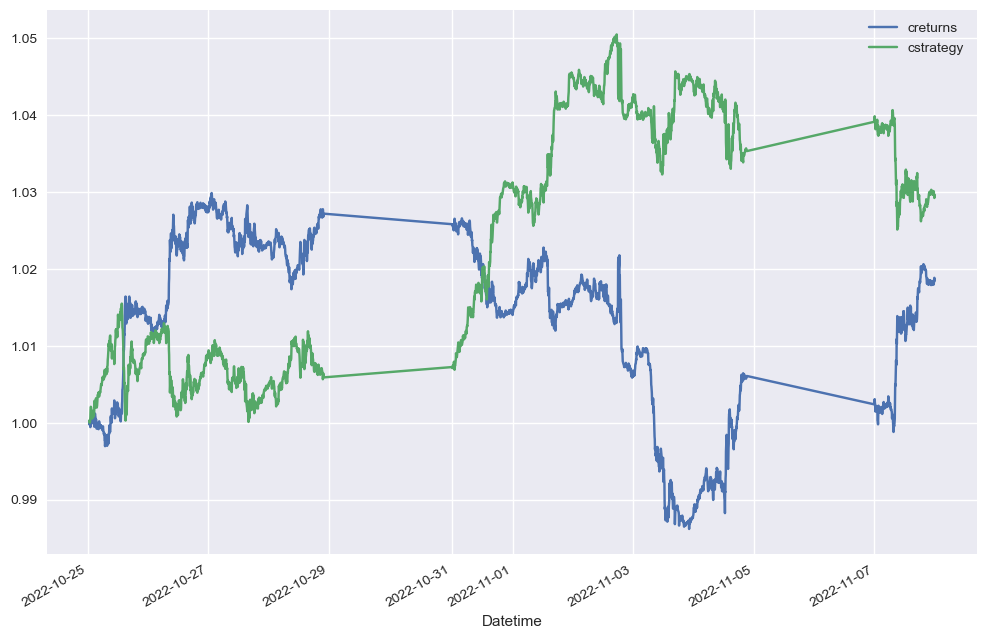

In [206]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()